In [1]:
import numpy as np
import pandas as pd
import scipy.stats as sp
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols

In [2]:
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm

In [17]:
from statsmodels.iolib.summary2 import summary_col

In [ ]:
!pip install linearmodels

In [79]:
from linearmodels import PanelOLS, RandomEffects

**Happiness score analysis**

In this part happiness score will be analyzed at the country level. 



In [3]:
#Read and process the data
data1 = pd.read_excel('Resources_data1.xlsx')

In [4]:
data1.head()

,Year,Happiness_score,Oil_Production,Oil_dependence,Income_per_capita(const_2015),Unemployment,delta,Ln_inc,laagged,Voice _account,Gov_Effectiveness,Regulatory_quality,Rule_of_law,Political_stab,Control_corrup
0,2010,5.384773,10.330000,9.9,7.108,7.4,NaN,1.961221,NaN,-0.888973,-0.468849,-0.353289,-0.764919,-0.929459,-1.090829
1,2011,5.388766,10.408923,11.4,7.783,6.5,-0.003993,2.051942,5.384773,-0.883594,-0.470777,-0.349168,-0.725692,-0.998262,-1.065004
2,2012,5.620736,10.596198,10.3,8.087,5.4,-0.231969,2.090258,5.388766,-0.978818,-0.420560,-0.338137,-0.818428,-0.817713,-1.042263
3,2013,5.537178,10.765588,9.1,8.040,5.5,0.083558,2.084429,5.620736,-1.022177,-0.355087,-0.351682,-0.784240,-0.736094,-1.013164
4,2014,6.036977,10.853318,9.2,7.865,5.2,-0.499799,2.062423,5.537178,-1.044410,-0.109697,-0.388624,-0.741557,-0.943617,-0.919227


In [5]:
#Time-series data -> set index
data1.set_index('Year', inplace=True)

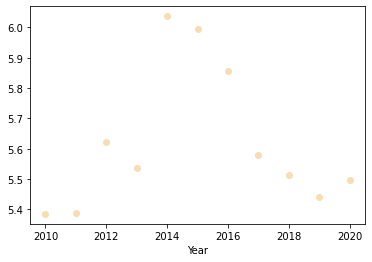

In [8]:
#Look at data distribution & whether we have missing values
data1['Happiness_score'].plot(color='wheat', marker='o', ls='');

Text(0.5, 0, 'Happiness Scores')

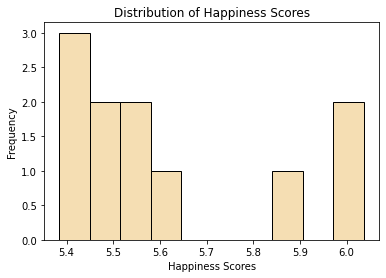

In [9]:
plt.hist(data1.Happiness_score,
        color = 'wheat', edgecolor = 'black')
plt.title('Distribution of Happiness Scores')
plt.ylabel('Frequency')
plt.xlabel('Happiness Scores')

In [10]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11 entries, 2010 to 2020
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Happiness_score                11 non-null     float64
 1   Oil_Production                 11 non-null     float64
 2   Oil_dependence                 11 non-null     float64
 3   Income_per_capita(const_2015)  11 non-null     float64
 4   Unemployment                   11 non-null     float64
 5   delta                          10 non-null     float64
 6   Ln_inc                         11 non-null     float64
 7   laagged                        10 non-null     float64
 8   Voice _account                 11 non-null     float64
 9   Gov_Effectiveness              11 non-null     float64
 10  Regulatory_quality             11 non-null     float64
 11  Rule_of_law                    11 non-null     float64
 12  Political_stab                 11 non-null     

Basic regression with and without dummies. We are interested in modelling the link between oil dependence and happiness score. 

In [11]:
est = smf.ols(formula='Happiness_score ~ Oil_dependence', data=data1).fit()
print (est.summary())

                            OLS Regression Results                            
Dep. Variable:        Happiness_score   R-squared:                       0.219
Model:                            OLS   Adj. R-squared:                  0.132
Method:                 Least Squares   F-statistic:                     2.526
Date:                Sat, 12 Nov 2022   Prob (F-statistic):              0.146
Time:                        13:02:51   Log-Likelihood:                 2.2639
No. Observations:                  11   AIC:                           -0.5278
Df Residuals:                       9   BIC:                            0.2680
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          6.0562      0.281     21.

In [12]:
est1 = smf.ols(formula='Happiness_score ~ Oil_dependence + Ln_inc', data=data1).fit()
print (est1.summary())

                            OLS Regression Results                            
Dep. Variable:        Happiness_score   R-squared:                       0.259
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     1.397
Date:                Sat, 12 Nov 2022   Prob (F-statistic):              0.302
Time:                        13:04:28   Log-Likelihood:                 2.5506
No. Observations:                  11   AIC:                            0.8988
Df Residuals:                       8   BIC:                             2.092
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          3.6663      3.664      1.

In [13]:
est2 = smf.ols(formula='Happiness_score ~ Oil_dependence + Ln_inc + Unemployment', data=data1).fit()
print (est2.summary())

                            OLS Regression Results                            
Dep. Variable:        Happiness_score   R-squared:                       0.261
Model:                            OLS   Adj. R-squared:                 -0.056
Method:                 Least Squares   F-statistic:                    0.8221
Date:                Sat, 12 Nov 2022   Prob (F-statistic):              0.522
Time:                        13:04:31   Log-Likelihood:                 2.5633
No. Observations:                  11   AIC:                             2.873
Df Residuals:                       7   BIC:                             4.465
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          4.2099      5.801      0.

In [14]:
#WGI Index
est3 = smf.ols(formula='Happiness_score ~ Oil_dependence + Ln_inc + Political_stab', data=data1).fit()
print (est3.summary())

                            OLS Regression Results                            
Dep. Variable:        Happiness_score   R-squared:                       0.540
Model:                            OLS   Adj. R-squared:                  0.343
Method:                 Least Squares   F-statistic:                     2.740
Date:                Sat, 12 Nov 2022   Prob (F-statistic):              0.123
Time:                        13:07:43   Log-Likelihood:                 5.1747
No. Observations:                  11   AIC:                            -2.349
Df Residuals:                       7   BIC:                           -0.7577
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.1380      3.319      0.

In [15]:
#WGI indexes
est4 = smf.ols(formula='Happiness_score ~ Oil_dependence + Ln_inc + Rule_of_law + Political_stab', data=data1).fit()
print (est4.summary())

                            OLS Regression Results                            
Dep. Variable:        Happiness_score   R-squared:                       0.547
Model:                            OLS   Adj. R-squared:                  0.245
Method:                 Least Squares   F-statistic:                     1.813
Date:                Sat, 12 Nov 2022   Prob (F-statistic):              0.245
Time:                        13:07:45   Log-Likelihood:                 5.2613
No. Observations:                  11   AIC:                           -0.5225
Df Residuals:                       6   BIC:                             1.467
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.5984      3.963      0.

In [24]:
#Collecting all the results in one table
print(summary_col([est,est1,est2,est3,est4],regressor_order=['const', 'x1'], stars=True,float_format='%0.3f',
    model_names=['one\n(0)','two\n(1)', 'three\n(1)', 'four\n(1)', 'five\n(1)'],
    ))


                 one      two    three    four    five 
                 (0)      (1)     (1)     (1)     (1)  
-------------------------------------------------------
Intercept      6.056*** 3.666   4.210   1.138   0.598  
               (0.281)  (3.664) (5.801) (3.319) (3.963)
Ln_inc                  1.240   1.001   2.230   2.219  
                        (1.895) (2.763) (1.666) (1.785)
Oil_dependence -0.052   -0.067  -0.062  -0.076* -0.073*
               (0.033)  (0.041) (0.055) (0.035) (0.038)
Political_stab                          -0.735* -0.751*
                                        (0.355) (0.384)
Rule_of_law                                     -0.690 
                                                (2.236)
Unemployment                    -0.017                 
                                (0.134)                
R-squared      0.219    0.259   0.261   0.540   0.547  
R-squared Adj. 0.132    0.074   -0.056  0.343   0.245  
Standard errors in parentheses.
* p<.1, ** p<.0

**Life satisfaction score analysis** \\
In this part we will analyze the effect of resource wealth, proxied by oil-dependence, on people well-being at the region level.

In [25]:
data = pd.read_excel('F00010964-WVS_Wave_7.xlsx')

In [ ]:
#data = data[['D_INTERVIEW: Interview ID', 'Q49: Satisfaction with your life', 'A_YEAR: Year of survey', 'N_REGION_ISO: Region ISO 3166-2', 'N_REGION_WVS: Region country specific', 'N_TOWN: Settlement name', 'Q260: Sex', 'Q262: Age', 'Q273: Marital status', 'Q274: How many children do you have', 'Q275R: Highest educational level: Respondent (recoded into 3 groups)', 'Q279: Employment status', 'Q288R: Income level (Recoded)']]

In [26]:
list(data.columns.values)

['A_YEARYearofsurvey',
 'D_INTERVIEWInterviewID',
 'N_REGION_ISORegionISO31662',
 'N_REGION_WVSRegioncountryspe',
 'N_TOWNSettlementname',
 'Q49Satisfactionwithyourlife',
 'Q260Sex',
 'Q262Age',
 'Q273Maritalstatus',
 'Q274Howmanychildrendoyouh',
 'Q275RHighesteducationallevel',
 'Q279Employmentstatus',
 'Q288RIncomelevelRecoded']

In [27]:
data.tail()

,A_YEARYearofsurvey,D_INTERVIEWInterviewID,N_REGION_ISORegionISO31662,N_REGION_WVSRegioncountryspe,N_TOWNSettlementname,Q49Satisfactionwithyourlife,Q260Sex,Q262Age,Q273Maritalstatus,Q274Howmanychildrendoyouh,Q275RHighesteducationallevel,Q279Employmentstatus,Q288RIncomelevelRecoded
1707,2017,643071806,643052,643002,643030,8,1,67,5,2,2,4,3
1708,2017,643071807,643052,643002,643030,7,1,74,3,1,3,4,2
1709,2017,643071808,643052,643002,643030,5,1,55,1,1,3,1,1
1710,2017,643071809,643052,643002,643030,9,2,30,1,1,1,1,2
1711,2017,643071810,643052,643002,643030,3,1,38,1,6,2,1,2


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1712 entries, 0 to 1711
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   A_YEARYearofsurvey            1712 non-null   int64
 1   D_INTERVIEWInterviewID        1712 non-null   int64
 2   N_REGION_ISORegionISO31662    1712 non-null   int64
 3   N_REGION_WVSRegioncountryspe  1712 non-null   int64
 4   N_TOWNSettlementname          1712 non-null   int64
 5   Q49Satisfactionwithyourlife   1712 non-null   int64
 6   Q260Sex                       1712 non-null   int64
 7   Q262Age                       1712 non-null   int64
 8   Q273Maritalstatus             1712 non-null   int64
 9   Q274Howmanychildrendoyouh     1712 non-null   int64
 10  Q275RHighesteducationallevel  1712 non-null   int64
 11  Q279Employmentstatus          1712 non-null   int64
 12  Q288RIncomelevelRecoded       1712 non-null   int64
dtypes: int64(13)
memory usage: 174.0 

Text(0.5, 0, 'Life satisfaction Scores')

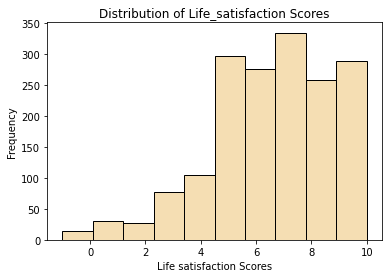

In [29]:
#Look at data visualization 
plt.hist(data.Q49Satisfactionwithyourlife,
        color = 'wheat', edgecolor = 'black')
plt.title('Distribution of Life_satisfaction Scores')
plt.ylabel('Frequency')
plt.xlabel('Life satisfaction Scores')

*Dummy creation and regression* \\
During the poll, people of all the ages were surveyed. Moreover, such sections as number of children, marital status, etc, contain more detailed data than just binary answers Yes or No. Hence, for more accurate data for modelling we will divide people into groups, instead of just getting dummies for each. 

In [30]:
def label_age (row):
   if row['Q262Age'] <= 29 :
      return 1
   return 0

In [31]:
df = data

In [ ]:
df.apply (lambda row: label_age(row), axis=1)

In [33]:
df['d_age_first_int'] = df.apply (lambda row: label_age(row), axis=1)

In [34]:
def label_age1 (row):
   if row['Q262Age'] >= 30 and row['Q262Age'] <= 45 :
      return 1
   return 0

In [91]:
df.apply (lambda row: label_age1(row), axis=1)

A_YEARYearofsurvey
2017    1
2017    0
2017    1
2017    0
2017    0
       ..
2017    0
2017    0
2017    0
2017    1
2017    1
Length: 1712, dtype: int64

In [36]:
df['d_age_second_int'] = df.apply (lambda row: label_age1(row), axis=1)

In [37]:
df.head()

,A_YEARYearofsurvey,D_INTERVIEWInterviewID,N_REGION_ISORegionISO31662,N_REGION_WVSRegioncountryspe,N_TOWNSettlementname,Q49Satisfactionwithyourlife,Q260Sex,Q262Age,Q273Maritalstatus,Q274Howmanychildrendoyouh,Q275RHighesteducationallevel,Q279Employmentstatus,Q288RIncomelevelRecoded,d_age_first_int,d_age_second_int
0,2017,643070001,643077,643003,643028,9,2,36,1,2,3,5,3,0,1
1,2017,643070002,643077,643003,643028,6,2,58,1,2,3,1,2,0,0
2,2017,643070003,643077,643003,643028,9,1,42,1,2,3,1,2,0,1
3,2017,643070004,643063,643007,643045,4,2,47,6,1,3,5,1,0,0
4,2017,643070005,643063,643007,643045,4,2,61,1,2,3,1,2,0,0


In [38]:
def label_age2 (row):
   if row['Q262Age'] >= 46 and row['Q262Age'] <= 60 :
      return 1
   return 0

In [ ]:
df.apply (lambda row: label_age2(row), axis=1)

In [40]:
df['d_age_third_int'] = df.apply (lambda row: label_age2(row), axis=1)

In [41]:
def label_age3 (row):
   if row['Q262Age'] >= 61 :
      return 1
   return 0

In [ ]:
df.apply (lambda row: label_age3(row), axis=1)

In [43]:
df['d_age_fourth_int'] = df.apply (lambda row: label_age3(row), axis=1)

In [44]:
def label_marital_status (row):
   if row['Q273Maritalstatus'] == 1 or row['Q273Maritalstatus'] == 2:
      return 1
   return 0

In [ ]:
df.apply (lambda row: label_marital_status(row), axis=1)

In [46]:
df['d_marital_status'] = df.apply (lambda row: label_marital_status(row), axis=1)

In [47]:
def label_children (row):
   if row['Q274Howmanychildrendoyouh'] >= 1 :
      return 1
   return 0

In [ ]:
df.apply (lambda row: label_children(row), axis=1)

In [49]:
df['d_children'] = df.apply (lambda row: label_children(row), axis=1)

In [50]:
def label_education (row):
   if row['Q275RHighesteducationallevel'] == 1 :
      return 1
   return 0

In [ ]:
df.apply (lambda row: label_education(row), axis=1)

In [52]:
df['d_education_low'] = df.apply (lambda row: label_education(row), axis=1)

In [53]:
def label_education1 (row):
   if row['Q275RHighesteducationallevel'] == 2 :
      return 1
   return 0

In [ ]:
df.apply (lambda row: label_education1(row), axis=1)

In [55]:
df['d_education_middle'] = df.apply (lambda row: label_education1(row), axis=1)

In [56]:
def label_education2 (row):
   if row['Q275RHighesteducationallevel'] == 3 :
      return 1
   return 0

In [ ]:
df.apply (lambda row: label_education2(row), axis=1)

In [58]:
df['d_education_high'] = df.apply (lambda row: label_education2(row), axis=1)

In [59]:
def label_employment (row):
   if row['Q279Employmentstatus'] == 1 or row['Q279Employmentstatus'] == 2 or row['Q279Employmentstatus'] == 3:
      return 1
   return 0

In [ ]:
df.apply (lambda row: label_employment(row), axis=1)

In [61]:
df['d_employment'] = df.apply (lambda row: label_employment(row), axis=1)

In [62]:
def label_income (row):
   if row['Q288RIncomelevelRecoded'] == 1 :
      return 1
   return 0

In [ ]:
df.apply (lambda row: label_income(row), axis=1)

In [64]:
df['d_income_low'] = df.apply (lambda row: label_income(row), axis=1)

In [65]:
def label_income1 (row):
   if row['Q288RIncomelevelRecoded'] == 2 :
      return 1
   return 0

In [ ]:
df.apply (lambda row: label_income1(row), axis=1)

In [67]:
df['d_income_medium'] = df.apply (lambda row: label_income1(row), axis=1)

In [68]:
def label_income2 (row):
   if row['Q288RIncomelevelRecoded'] == 3 :
      return 1
   return 0

In [ ]:
df.apply (lambda row: label_income2(row), axis=1)

In [70]:
df['d_income_high'] = df.apply (lambda row: label_income2(row), axis=1)

In [71]:
def label_oil (row):
   if row['N_REGION_ISORegionISO31662'] == 643070 or row['N_REGION_ISORegionISO31662'] == 643019 or row['N_REGION_ISORegionISO31662'] == 643055 or row['N_REGION_ISORegionISO31662'] == 643026 or row['N_REGION_ISORegionISO31662'] == 643037 or row['N_REGION_ISORegionISO31662'] == 643017 or row['N_REGION_ISORegionISO31662'] == 643061 or row['N_REGION_ISORegionISO31662'] == 643062 or row['N_REGION_ISORegionISO31662'] == 643027 or row['N_REGION_ISORegionISO31662'] == 643033 or row['N_REGION_ISORegionISO31662'] == 643003:
      return 1
   return 0

In [ ]:
df.apply (lambda row: label_oil(row), axis=1)

In [73]:
df['oil_rich'] = df.apply (lambda row: label_oil(row), axis=1)

In [80]:
categorical_col_updated = ['Q260Sex']
df = pd.get_dummies(df, columns=categorical_col_updated, drop_first=True)

In [81]:
df.head()

,A_YEARYearofsurvey,D_INTERVIEWInterviewID,N_REGION_ISORegionISO31662,N_REGION_WVSRegioncountryspe,N_TOWNSettlementname,Q49Satisfactionwithyourlife,Q262Age,Q273Maritalstatus,Q274Howmanychildrendoyouh,Q275RHighesteducationallevel,...,d_children,d_education_low,d_education_middle,d_education_high,d_employment,d_income_low,d_income_medium,d_income_high,oil_rich,Q260Sex_2
0,2017,643070001,643077,643003,643028,9,36,1,2,3,...,1,0,0,1,0,0,0,1,0,1
1,2017,643070002,643077,643003,643028,6,58,1,2,3,...,1,0,0,1,1,0,1,0,0,1
2,2017,643070003,643077,643003,643028,9,42,1,2,3,...,1,0,0,1,1,0,1,0,0,0
3,2017,643070004,643063,643007,643045,4,47,6,1,3,...,1,0,0,1,0,1,0,0,0,1
4,2017,643070005,643063,643007,643045,4,61,1,2,3,...,1,0,0,1,1,0,1,0,0,1


In [82]:
df = df.set_index(['A_YEARYearofsurvey'])

In [83]:
df['d_sex'] = df['Q260Sex_2']

In [84]:
df = df.drop('Q260Sex_2', axis=1)

In [85]:
#build the model
mod = smf.ols(formula='Q49Satisfactionwithyourlife ~ 1 + oil_rich + d_sex + d_income_medium + d_income_high', data=df).fit()
print (mod.summary())


                                 OLS Regression Results                                
Dep. Variable:     Q49Satisfactionwithyourlife   R-squared:                       0.081
Model:                                     OLS   Adj. R-squared:                  0.079
Method:                          Least Squares   F-statistic:                     37.74
Date:                         Sat, 12 Nov 2022   Prob (F-statistic):           2.71e-30
Time:                                 13:39:26   Log-Likelihood:                -3690.4
No. Observations:                         1712   AIC:                             7391.
Df Residuals:                             1707   BIC:                             7418.
Df Model:                                    4                                         
Covariance Type:                     nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

In [86]:
mod = smf.ols(formula='Q49Satisfactionwithyourlife ~ 1 + oil_rich + d_sex + d_income_medium + d_income_high + d_education_middle + d_education_high + d_employment + d_marital_status + d_children ', data=df)
mod_res = mod.fit(cov_type='HC0')
mod_res.summary(yname="Life satisfaction")

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Life satisfaction   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.083
Method:                 Least Squares   F-statistic:                     17.17
Date:                Sat, 12 Nov 2022   Prob (F-statistic):           2.10e-27
Time:                        13:39:32   Log-Likelihood:                -3684.6
No. Observations:                1712   AIC:                             7389.
Df Residuals:                    1702   BIC:                             7444.
Df Model:                           9                                         
Covariance Type:                  HC0                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              5.5165      0.218     25.359      0.000       5.090       5.943
oil_rich              -0.2553      0.132     -1.936      0.053      -0.514       0.003
d_sex                  0.0218      0.111      0.196      0.845      -0.196       0.240
d_income_medium        1.0345      0.130      7.966      0.000       0.780       1.289
d_income_high          2.1088      0.213      9.897      0.000       1.691       2.526
d_education_middle     0.0829      0.196      0.423      0.672      -0.301       0.467
d_education_high      -0.0527      0.178     -0.296      0.767      -0.402       0.296
d_employment           0.0940      0.113      0.833      0.405      -0.127       0.315
d_marital_status       0.3503      0.113      3.110      0.002       0.130       0.571
d_children            -0.0845      0.127     -0.663      0.507      -0.334       0.165
==============================================================================
Omnibus:                       67.142   Durbin-Watson:                   1.884
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               80.575
Skew:                          -0.437   Prob(JB):                     3.19e-18
Kurtosis:                       3.604   Cond. No.                         10.1
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
"""

In [87]:
df.rename(columns={'Q49Satisfactionwithyourlife': 'Life_satisfaction'}, inplace=True)

In [90]:
#make sense to show only the one with dummies
mod = smf.ols(formula='Life_satisfaction ~ 1 + oil_rich + d_sex + d_income_medium + d_income_high + d_education_middle + d_education_high + d_employment + d_marital_status + d_children ', data=df)
mod_res = mod.fit(cov_type='HC0')
all_regressors = sorted(list(set(mod.exog_names)))
all_regressors_no_fe = [var_name for var_name in all_regressors if not var_name.startswith('d_')]


print (summary_col(mod_res, stars = True, regressor_order = all_regressors_no_fe, drop_omitted=True))


               Life_satisfaction
--------------------------------
Intercept      5.5165***        
               (0.2175)         
oil_rich       -0.2553*         
               (0.1319)         
R-squared      0.0875           
R-squared Adj. 0.0827           
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01
